# A téma ismertetése:

Ebben a bejegyzésben azt fogjuk megvizsgálni, hogyan használjuk a Keras nevű csomagot az első neurális hálózatunk létrehozásához, hogy megjósoljuk, hogy a lakásárak a mediánérték felett vagy alatt vannak-e. Konkrétan végigmegyünk a teljes Deep Learning pipeline-on, a következők szerint:

*   Az adatok feltárása és feldolgozása
*   Neurális hálózatunk építése és képzése
*   A veszteség és a pontosság vizualizálása
*   Szabályozás hozzáadása a neurális hálózatunkhoz

Az adatok feltárása és feldolgozása
Mielőtt bármilyen ML-algoritmust kódolnánk, az első dolog, amit tennünk kell, hogy az adatainkat olyan formátumba hozzuk, amelyet az algoritmus szeretne. Különösen a következőkre van szükségünk:
*   Beolvasni a CSV (vesszővel elválasztott értékek) fájlt, és tömbökké alakítani őket. A tömbök olyan adatformátumot jelentenek, amelyet az algoritmusunk fel tud dolgozni.
*   Az adathalmazunkat fel kell osztanunk a bemeneti jellemzőkre (amelyeket x-nek nevezünk) és a címkékre (amelyeket y-nak nevezünk).
*   Méretezzük az adatokat (ezt nevezzük normalizálásnak), hogy a bemeneti jellemzők hasonló nagyságrendűek legyenek.
*   Osszuk fel az adathalmazunkat a gyakorlóhalmazra, a validációs halmazra és a teszthalmazra.

# Adathalmaz:

A ma használt adathalmaz a Zillow Home Value Prediction Kaggle verseny adataiból származik. Csökkentettük a bemeneti jellemzők számát, és a feladatot úgy módosítottuk, hogy megjósoljuk, hogy a ház ára a mediánérték felett vagy alatt van-e.

In [1]:
import pandas as pd

Ez csak azt jelenti, hogy ha a 'pandas' csomagban lévő kódra akarok hivatkozni, akkor a pd névvel fogok rá hivatkozni. Ezután beolvassuk a CSV fájlt a következő kódsor futtatásával:

In [3]:
df = pd.read_csv('housepricedata.csv')

Ez a kódsor azt jelenti, hogy beolvassuk a 'housepricedata.csv' csv fájlt (amelynek ugyanabban a könyvtárban kell lennie, mint a notebookunknak), és a 'df' változóban tároljuk. Ha meg akarjuk tudni, hogy mi van a df-ben, egyszerűen írjuk be a df-et a szürke mezőbe, és nyomjuk meg az Alt-Enter billentyűt:
A notebookodnak valahogy így kell kinéznie:

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Itt egy kicsit felfedezheti az adatokat. A bemeneti jellemzőink az első tíz oszlopban vannak:
*   A telek területe (négyzetméterben)
*   Általános minőség (1-től 10-ig terjedő skála)
*   Általános állapot (1-től 10-ig terjedő skála)
*   Teljes pincefelület (négyzetméterben)
*   Teljes fürdőszobák száma
*   Félfürdőszobák száma
*   Földszint feletti hálószobák száma
*   Földszint feletti szobák száma összesen
*   Kandallók száma
*   Garázs területe (négyzetméterben)

Az utolsó oszlopban van az a tulajdonság, amelyet szeretnénk megjósolni:
*   A ház ára a medián felett van-e vagy sem? (1 az igen és 0 a nem)

Most, hogy láttuk, hogyan néznek ki az adataink, szeretnénk azokat tömbökké alakítani, hogy a gépünk feldolgozhassa őket:

In [5]:
dataset = df.values

Az adatkeretünk tömbté alakításához egyszerűen tároljuk a df értékeit (a df.values elérésével) a 'dataset' változóban. Ahhoz, hogy megnézzük, mi van ebben a 'dataset' változóban, egyszerűen írjuk be a 'dataset' szót a notebook szürke dobozába, és futtassuk le a cellát (Alt-Enter):

Amint láthatod, most minden egy tömbben van tárolva:

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Most az adathalmazunkat felosztjuk bemeneti jellemzőkre (X) és a megjósolni kívánt jellemzőre (Y). Ehhez a felosztáshoz egyszerűen hozzárendeljük a tömbünk első 10 oszlopát egy X nevű változóhoz, a tömbünk utolsó oszlopát pedig egy Y nevű változóhoz:

In [7]:
X = dataset[:,0:10]

Ez egy kicsit furcsának tűnhet, de hadd magyarázzam el, mi van a szögletes zárójelek között. Minden, ami a vessző előtt van, a tömb soraira utal, és minden, ami a vessző után van, a tömbök oszlopaira.

Mivel nem osztjuk fel a sorokat, ezért a vessző elé ':'-t teszünk. Ez azt jelenti, hogy az adatkészlet összes sorát vesszük és X-be tesszük.

Az első 10 oszlopot szeretnénk kivenni, ezért a vessző utáni '0:10' azt jelenti, hogy vegyük a 0-9 oszlopokat és tegyük az X-be (a 10. oszlopot nem vesszük bele). Az oszlopaink a 0 indexszel kezdődnek, így az első 10 oszlop valójában a 0-9 oszlopok.

Ezután a tömbünk utolsó oszlopát az Y-hoz rendeljük:

In [8]:
Y = dataset[:,10]

Oké, most már felosztottuk az adathalmazunkat bemeneti jellemzőkre (X) és annak a címkére, amit meg akarunk jósolni (Y).

A feldolgozásunk következő lépése, hogy megbizonyosodjunk arról, hogy a bemeneti jellemzők skálája hasonló. Jelenleg az olyan jellemzők, mint a telek területe, ezres nagyságrendűek, az általános minőségre vonatkozó pontszám 1 és 10 között mozog, a kandallók száma pedig általában 0, 1 vagy 2 értékű.

Ez megnehezíti a neurális hálózat inicializálását, ami gyakorlati problémákat okoz. Az adatok skálázásának egyik módja a scikit-learn egy meglévő csomagjának használata.

Először is importálnunk kell a kódot, amelyet használni szeretnénk:

In [9]:
from sklearn import preprocessing

Ez azt mondja, hogy a sklearn csomagon belül a 'preprocessing' kódot szeretném használni. Ezután egy min-max scaler nevű függvényt használunk, amely úgy méretezi az adathalmazt, hogy az összes bemeneti jellemző 0 és 1 között legyen:

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

Megjegyzendő, hogy szándékosan választottuk a 0 és 1 értékeket, hogy segítsük a neurális hálózatunk képzését. Nem fogjuk végigvenni az elméletet, ami emögött áll. Most a skálázott adathalmazunkat az 'X_scale' tömbben tároljuk. Ha látni szeretné, hogyan néz ki az 'X_scale', egyszerűen futtassa a cellát:
A Jupyter notebookodnak most már valahogy így kell kinéznie:

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Most az adatok feldolgozásának utolsó lépésénél tartunk, ami az adathalmazunk felosztása egy képzési halmazra, egy validálási halmazra és egy teszthalmazra.

A scikit-learn "train_test_split" nevű kódját fogjuk használni, amely, ahogy a neve is mutatja, az adathalmazunkat egy gyakorló és egy tesztkészletre osztja. Először is importáljuk a szükséges kódot:

In [12]:
from sklearn.model_selection import train_test_split

Ezután ossza fel az adatállományt a következőképpen:
Ez azt mondja a scikit-learnnek, hogy a val_and_test mérete a teljes adathalmaz 30%-a lesz. A kód a felosztott adatokat az egyenlőségjel bal oldalán lévő első négy változóba fogja tárolni, ahogy a változónevek is sugallják.

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

Sajnos ez a funkció csak abban segít, hogy az adathalmazunkat kettéosszuk. Mivel külön validációs és külön tesztkészletet szeretnénk, ugyanazzal a függvénnyel újra elvégezhetjük a felosztást a val_és_tesztkészleten:

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

A fenti kód a val_és_test méretét egyenlően osztja fel a validációs és a tesztkészletre.

Összefoglalva, most már összesen hat változóval rendelkezünk az általunk használt adatkészletekhez:
*   X_train (10 bemeneti jellemző, a teljes adathalmaz 70%-a)
*   X_val (10 bemeneti jellemző, a teljes adathalmaz 15%-a)
*   X_test (10 bemeneti jellemző, a teljes adathalmaz 15%-a)
*   Y_train (1 címke, a teljes adathalmaz 70%-a)
*   Y_val (1 címke, a teljes adatállomány 15%-a)
*   Y_test (1 címke, a teljes adatállomány 15%-a)

Ha látni szeretné, hogy a tömbök milyen alakúak az egyes tömbök (azaz milyen dimenziójúak), egyszerűen futtassa le a print esetet.
Így kell kinéznie a Jupyter notebooknak:

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


Mint látható, a gyakorlóhalmaz 1022 adatpontot tartalmaz, míg a validációs és teszthalmaz egyenként 219 adatpontot. Az X változók 10 bemeneti jellemzővel rendelkeznek, míg az Y változóknak csak egy jellemzőt kell megjósolniuk.

És most végre készen vannak az adataink! Júúúhéééé!

Összefoglaló: Az adatok feldolgozása során:
*   Beolvastuk a CSV (vesszővel elválasztott értékek) fájlt, és tömbökké alakítottuk őket.
*   Az adathalmazunkat felosztottuk a bemeneti jellemzők és a címke között.
*   Méreteztük az adatokat úgy, hogy a bemeneti jellemzők hasonló nagyságrendűek legyenek.
*   Osszuk fel az adathalmazunkat a gyakorlóhalmazra, a validációs halmazra és a teszthalmazra.

# Az első neurális hálózatunk építése és kiképzése
Az Intuitív mélytanulás, azt mondtuk, hogy a gépi tanulás két lépésből áll. Az első lépés egy sablon (egy architektúra) megadása, a második lépés pedig a legjobb számok megtalálása az adatokból, hogy kitöltsük ezt a sablont. A kódunk innentől kezdve szintén ezt a két lépést fogja követni.

# Első lépés: Az architektúra beállítása
Az első teendőnk az architektúra beállítása. Először is gondoljuk át, hogy milyen neurális hálózati architektúrát szeretnénk. Tegyük fel, hogy ezt a neurális hálózatot szeretnénk:

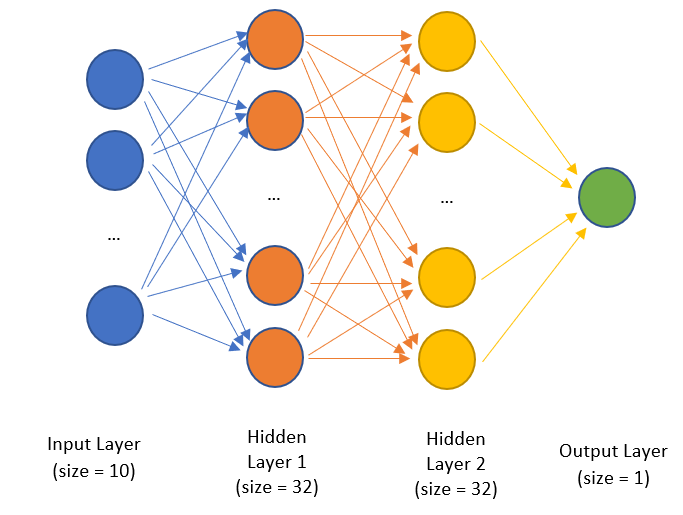

Ezek a rétegek:
*   Rejtett réteg 1: 32 neuron, ReLU-aktiválás
*   Rejtett réteg 2: 32 neuron, ReLU aktiválás
*   Kimeneti réteg: 1 neuron, Sigmoid aktiválás

Most ezt az architektúrát kell leírnunk a Keras számára. A szekvenciális modellt fogjuk használni, ami azt jelenti, hogy csupán a fenti rétegeket kell leírnunk egymás után.

Először is importáljuk a szükséges kódot a Kerasból:

In [16]:
#FNW
from keras.models import Sequential
from keras.layers import Dense #fully connected layer system

2024-03-25 17:16:29.511769: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 17:16:29.515629: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 17:16:29.582680: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 17:16:37.745720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Ezután ezt a Keras szekvenciális modellünkben így adjuk meg:

És csak így, a fenti kódrészlet meghatározta az architektúránkat! A fenti kód így értelmezhető: 

model = Sequential([ ... ])

Ez azt mondja, hogy a modellünket a 'model' változóban fogjuk tárolni, és a szögletes zárójelek között szekvenciálisan (rétegről rétegre) fogjuk leírni.

Dense(32, activation='relu', input_shape=(10,)),

Az első rétegünk egy sűrű réteg, 32 neuronnal, ReLU aktiválással, és a bemeneti alak 10, mivel 10 bemeneti jellemzőnk van. Megjegyezzük, hogy a "Dense" a teljesen összekapcsolt rétegre utal, amit használni fogunk.

Dense(32, activation='relu'),

A második rétegünk szintén egy sűrű réteg 32 neuronnal, ReLU aktiválással. Megjegyezzük, hogy nem kell leírnunk a bemeneti alakot, mivel a Keras képes következtetni az első rétegünk kimenetéből.

Dense(1, activation='sigmoid'),


A harmadik rétegünk egy sűrű réteg 1 neuronnal, szigmoid aktiválással.

És máris megírtuk a modellünk architektúráját (sablon) kódban!

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

/run/media/hunor/Adatok/Egyetem/Egyetem 3. év/2. félév/MestersegesIntelligencia/labor6/.venv/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-03-25 17:16:41.633738: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-25 17:16:41.634579: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at htt

# Második lépés: A legjobb számok kitöltése
Most, hogy megadtuk az architektúránkat, meg kell találnunk a legjobb számokat hozzá. Mielőtt elkezdenénk a képzést, konfigurálnunk kell a modellt az alábbiak szerint.

Megadjuk neki, hogy melyik algoritmust szeretnénk használni az optimalizáláshoz
Megmondjuk, hogy milyen veszteségfüggvényt használjon.

Megmondjuk, hogy a veszteségfüggvényen kívül milyen más mérőszámokat szeretnénk követni.

A modell konfigurálásához ezekkel a beállításokkal meg kell hívnunk a model.compile függvényt, így:

In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

A következő beállításokat a zárójelek közé tesszük a model.compile után:
*   optimizer='sgd' - Az 'sgd' a sztochasztikus gradiens ereszkedésre utal 
*   loss='binary_crossentropy' - Az 1 vagy 0 értékű kimenetekre vonatkozó veszteségfüggvényt bináris keresztentrópiának nevezzük.
*   metrics=['accuracy'] -Végül a veszteségfüggvényen felül a pontosságot is nyomon akarjuk követni. 

Az adatokon való képzés meglehetősen egyszerű, és egyetlen sor kódot kell írnunk:

adatokhoz illesztjük. Meg kell adnunk, hogy milyen adatokra képezünk, ezek az X_train és Y_train adatok. Ezután megadjuk a minitételünk méretét, és azt, hogy mennyi ideig szeretnénk edzeni (epochák). Végül megadjuk, hogy mik a validációs adataink, hogy a modell minden egyes ponton megmondja, hogyan teljesítünk a validációs adatokon. Ez a függvény egy előzményt ad ki, amelyet a hist változó alatt mentünk el. Ezt a változót kicsit később fogjuk használni, amikor a vizualizációra térünk.

Most futtasd a cellát, és nézd, ahogy edz! A Jupyter notebookodnak így kell kinéznie:

In [19]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5759 - loss: 0.6786 - val_accuracy: 0.5479 - val_loss: 0.6713
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5497 - loss: 0.6704 - val_accuracy: 0.5342 - val_loss: 0.6628
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5496 - loss: 0.6605 - val_accuracy: 0.5799 - val_loss: 0.6557
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5912 - loss: 0.6512 - val_accuracy: 0.6210 - val_loss: 0.6488
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.6431 - val_accuracy: 0.6758 - val_loss: 0.6418
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6731 - loss: 0.6356 - val_accuracy: 0.7215 - val_loss: 0.6348
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.6343 - val_accuracy: 0.7443 - val_loss: 0.6277
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.6273 - val_accuracy: 0.7671 - val_loss: 0.6

Most már láthatod, hogy a modell edzésben van! A számok alapján láthatja, hogy a veszteség csökken, a pontosság pedig nő az idő múlásával. Ezen a ponton kísérletezhet a hiperparaméterekkel és a neurális hálózat architektúrájával. Futtassa le újra a cellákat, hogy megnézze, hogyan változott a képzés, ha módosította a hiperparamétereket.

Ha elégedett a végleges modellel, ki tudjuk értékelni a tesztkészleten. A tesztkészleten való pontosság megállapításához futtassuk le ezt a kódrészletet:

In [20]:
model.evaluate(X_test, Y_test)[1]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.2942 


0.844748854637146

Azért van az 1-es index a model.evaluate függvény után, mert a függvény a veszteséget adja vissza első elemként, a pontosságot pedig második elemként. Ha csak a pontosságot szeretnénk kiadni, egyszerűen lépjünk be a második elembe (amely 1-gyel van indexelve, mivel az első elem indexelése 0-ról indul).

Az adathalmaz felosztásának véletlenszerűsége, valamint a súlyok inicializálása miatt a számok és a grafikon minden egyes alkalommal, amikor a notebookot futtatjuk, kissé különbözni fognak. Ennek ellenére a tesztek pontosságának 80% és 95% között kell lennie, ha a fent megadott architektúrát követtük!

És meg is van, meg is van a legelső neurális hálózatod, és be is tanítottad! Gratulálok!

Összefoglalva: Az első neurális hálózatunk kódolásához mindössze néhány sornyi kódra volt szükség:
*   Az architektúrát a Keras szekvenciális modellel adjuk meg.
*   Néhány beállításunkat (optimalizáló, veszteségfüggvény, követendő metrikák) a model.compile segítségével adjuk meg.
*   A modellünket betanítjuk (megtaláljuk a legjobb paramétereket az architektúránkhoz) a képzési adatokkal a model.fit segítségével.
*   Kiértékeljük a modellünket a tesztkészleten a model.evaluate segítségével.

# A veszteség és a pontosság vizualizálása
Beszéltünk a túlillesztésről és néhány regularizációs technikáról. Honnan tudjuk, hogy a modellünk jelenleg túlilleszkedik-e?

Azt tehetjük, hogy a képzési veszteséget és a val loss-t ábrázoljuk az eltelt epochák számának függvényében. Néhány szép grafikon megjelenítéséhez a matplotlib csomagot fogjuk használni. Szokás szerint importálnunk kell a használni kívánt kódot:

In [21]:
import matplotlib.pyplot as plt

Ezután szeretnénk megjeleníteni a képzési veszteséget és a validálási veszteséget. Ehhez futtassa ezt a kódrészletet:

A fenti kódrészlet minden egyes sorát megmagyarázzuk. Az első két sor azt mondja, hogy a veszteséget és a val_loss-t akarjuk ábrázolni. A harmadik sor megadja a grafikon címét: "Model Loss". A negyedik és az ötödik sor megmondja, hogy az y és x tengelyt mivel kell jelölni. A hatodik sor tartalmazza a grafikonunk legendáját, és a legenda helye a jobb felső sarokban lesz. A hetedik sor pedig megmondja a Jupyter notebooknak, hogy jelenítse meg a grafikont.

A Jupyter notebookunknak valahogy így kell kinéznie:

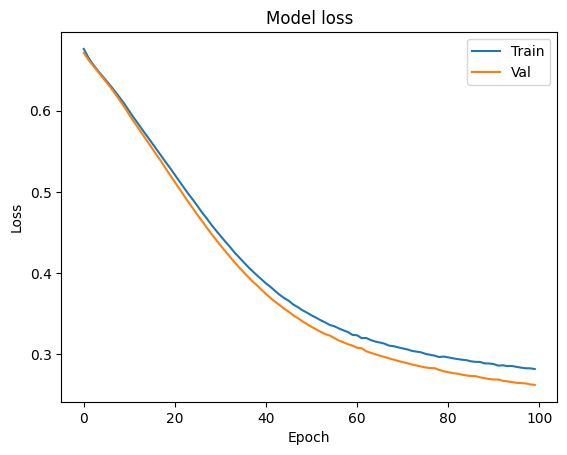

In [22]:
#We want to visualize the training loss and the validation loss like this:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Ugyanezt megtehetjük a képzési pontosság és a validálási pontosság ábrázolásához az alábbi kóddal:

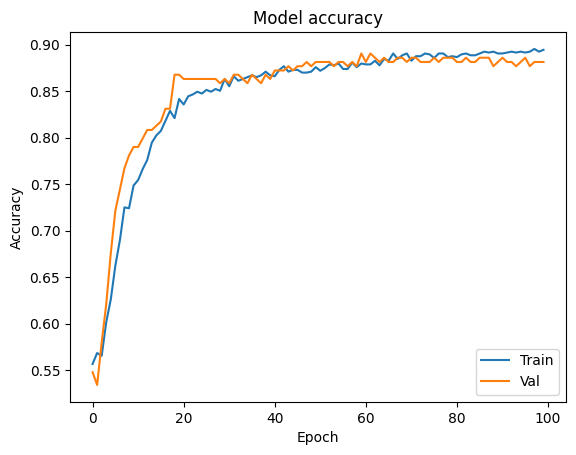

In [23]:
plt.plot(hist.history['accuracy'])#acc
plt.plot(hist.history['val_accuracy'])#val_acc
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


Mivel a modellünk javulásai a képzési halmazon némileg megegyeznek a validálási halmaz javulásaival, nem úgy tűnik, hogy a modellünkben a túlillesztés hatalmas problémát jelentene.

Összegzés: A matplotlib segítségével megjelenítjük a képzési és validálási veszteséget / pontosságot az idő múlásával, hogy lássuk, van-e túlilleszkedés a modellünkben.

# Regularizáció hozzáadása a neurális hálózatunkhoz
Ahhoz, hogy regularizációt vezessünk be neurális hálózatunkba, fogalmazzunk egy olyan neurális hálózattal, amely rosszul overfiteli a képzési halmazunkat. Ezt nevezzük 2-es modellnek.

In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


/run/media/hunor/Adatok/Egyetem/Egyetem 3. év/2. félév/MestersegesIntelligencia/labor6/.venv/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6641 - loss: 0.5685 - val_accuracy: 0.8584 - val_loss: 0.3599
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8652 - loss: 0.3485 - val_accuracy: 0.8858 - val_loss: 0.2828
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8792 - loss: 0.3252 - val_accuracy: 0.8813 - val_loss: 0.2941
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8951 - loss: 0.2722 - val_accuracy: 0.8995 - val_loss: 0.2889
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9087 - loss: 0.2782 - val_accuracy: 0.8950 - val_loss: 0.2978
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8837 - loss: 0.2816 - val_accuracy: 0.8995 - val_loss: 0.2552
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8908 - loss: 0.3011 - val_accuracy: 0.8995 - val_loss: 0.2397
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9044 - loss: 0.2412 - val_accuracy: 0.9041 - val_l

Itt egy sokkal nagyobb modellt készítettünk, és az Adam optimalizálót használtuk. Az Adam az egyik leggyakrabban használt optimalizáló, amely néhány finomítást ad a sztochasztikus gradiens ereszkedéshez, hogy gyorsabban elérje az alsó veszteségfüggvényt. Ha lefuttatjuk ezt a kódot, és az alábbi kód segítségével ábrázoljuk a veszteséggrafikonokat a hist_2-re (figyeljük meg, hogy a kód ugyanaz, kivéve, hogy a 'hist' helyett a 'hist_2'-t használjuk):

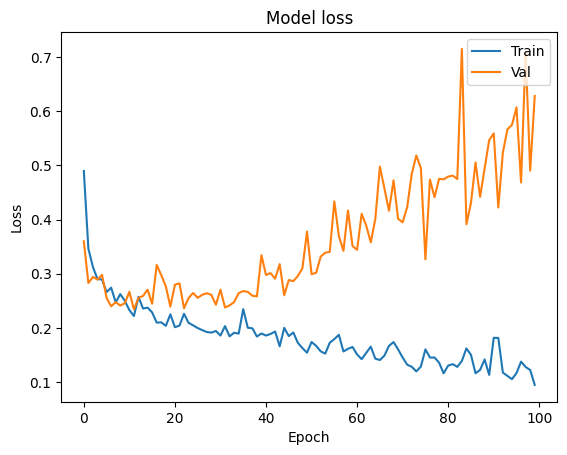

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Ez a túlillesztés egyértelmű jele. A képzési veszteség csökken, de a validálási veszteség jóval a képzési veszteség felett van és növekszik (a 20. epocha fordulópontján túl). Ha az alábbi kód segítségével ábrázoljuk a pontosságot:

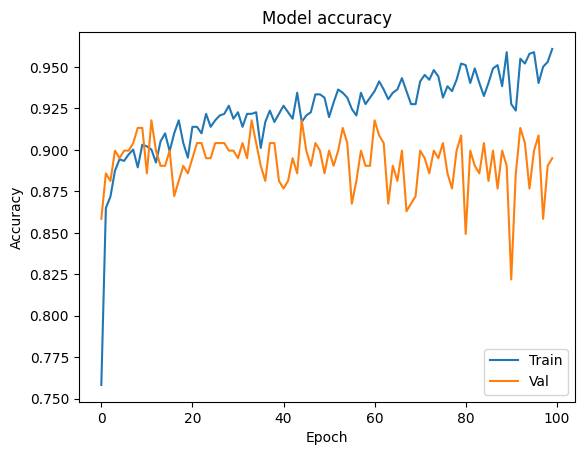

In [26]:
plt.plot(hist_2.history['accuracy'])#acc
plt.plot(hist_2.history['val_accuracy'])#val_acc
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Egyértelműbb eltérést láthatunk a vonat és a validálás pontossága között is:

Most próbáljunk ki néhány stratégiát a túlillesztés csökkentésére (eltekintve attól, hogy az architektúránkat visszaváltoztatjuk az első modellünkre). Három stratégiát vezettünk be a túlillesztés csökkentésére.

A három közül itt az L2 regularizációt és a dropoutot fogjuk beépíteni. Azért nem adunk hozzá early stoppingot itt, mert miután az első két stratégiát használtuk, a validációs veszteség nem veszi fel a fent látható U alakot, és így a korai stopping nem lesz olyan hatékony.

Először is importáljuk a kódot, amelyre az L2 regularizációhoz és a kieséshez van szükségünk:

In [27]:
from tensorflow.python.keras import regularizers
from keras.layers import Dropout

Ezután a harmadik modellünket így határozzuk meg:

In [31]:
from keras.regularizers import l2
#To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)),
])

Felismeri a Model 3 és a Model 2 közötti különbségeket? Két fő különbség van:

Az L2-regulázás hozzáadásához vegyük észre, hogy minden egyes denses rétegünkben egy kis extra kódot adtunk hozzá, így:
1. különbség:
kernel_regularizer=regularizers.l2(0.01) - Ez azt mondja a Kerasnak, hogy vegye figyelembe ezeknek a paramétereknek a négyzetértékeit a teljes veszteségfüggvényünkben, és súlyozza őket 0,01-gyel a veszteségfüggvényben.

2. különbség: A Dropout hozzáadásához egy új réteget adtunk hozzá, így: 
Dropout(0.3), - Ez azt jelenti, hogy az előző réteg neuronjai 0,3 valószínűséggel esnek ki a képzés során. Állítsuk össze és futtassuk le ugyanazokkal a paraméterekkel, mint a 2. modellünket (a túlilleszkedő):

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5076 - loss: 21.0913 - val_accuracy: 0.7626 - val_loss: 3.8813
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8060 - loss: 2.4775 - val_accuracy: 0.8858 - val_loss: 0.6234
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8687 - loss: 0.6234 - val_accuracy: 0.8813 - val_loss: 0.4908
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8861 - loss: 0.4767 - val_accuracy: 0.8767 - val_loss: 0.4816
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8778 - loss: 0.4854 - val_accuracy: 0.8721 - val_loss: 0.4709
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8437 - loss: 0.5274 - val_accuracy: 0.8493 - val_loss: 0.5209
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8772 - loss: 0.4977 - val_accuracy: 0.8767 - val_loss: 0.4259
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8678 - loss: 0.4730 - val_accuracy: 0.8904 - val_

És most rajzoljuk fel a veszteség és a pontosság grafikonjait. Észre fogja venni, hogy a veszteség sokkal nagyobb az elején, és ez azért van, mert megváltoztattuk a veszteségfüggvényünket. Ahhoz, hogy a veszteséget úgy ábrázoljuk, hogy az ablak 0 és 1,2 közé legyen nagyítva, egy további kódsort (plt.ylim) adunk hozzá az ábrázoláskor:

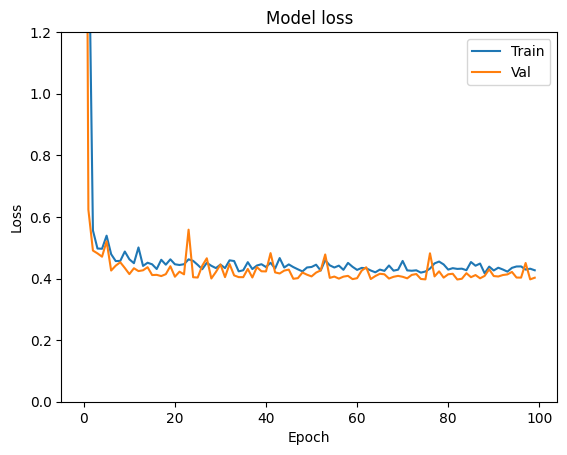

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

Láthatjuk, hogy a validációs veszteség sokkal jobban megfelel a képzési veszteségünknek. Ábrázoljuk a pontosságot hasonló kódrészlettel:

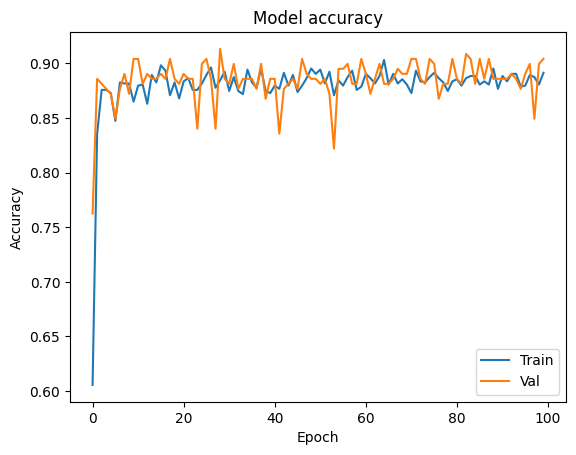

In [34]:
plt.plot(hist_3.history['accuracy'])#acc
plt.plot(hist_3.history['val_accuracy'])#val_acc
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

A 2. modellünkhöz képest jelentősen csökkentettük a túlillesztést! És így alkalmazzuk a regularizációs technikáinkat a túlillesztés csökkentésére a képzési halmazon.

Összefoglalva: A túlillesztés kezelésére a következő stratégiákat kódolhatjuk be a modellünkbe, amelyek mindegyike körülbelül egy sornyi kódot tartalmaz:
*   L2 Regularization
*   Dropout

Ha megjelenítjük a képzési / validálási veszteséget és a pontosságot, láthatjuk, hogy ezek a kiegészítések segítettek a túlillesztés kezelésében!

# Megoldandó feladatok:
1.   Hozd müködésbe a kódot mi hiányzik?
2.   Próbálj egy olyan modelt építeni ami alul illesztés áldozata lesz, az eredmények hasonlóak kell legyenek a túlilesztésére, mivel nem képpes megtanulni a dolgokat így sok hibát fog véteni.
3.   Építs egy olyan modelt ami előidézi a túlilesztést másabbat a megadottól. Ha megépítetted és sikerült válaszolj egy olyan kérdésre, hogy hogyan történhetett ez? 

